In [1]:
from twquant import stockindc as si
from twquant import gen, drv

In [2]:
drv.pd.set_option('display.max_rows', 5000)
drv.pd.set_option('display.max_columns', 500)
drv.pd.set_option('display.width', 1000)
drv.plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
drv.plt.rcParams['axes.unicode_minus'] = False

# Download

In [10]:
download_list = ('ratio','rpt','etf', 'div', 'rdc', 'adjusting_price', 'comparing_stock')
start_y = 2011 
end_y = 2019 
for i, x in enumerate(download_list):
    end_y = end_y if i in (0,1,5,6) else end_y+1
    drv.download(x, start_y, end_y)        

In [9]:
# check if computing yoy fine

In [3]:
y_2018 = si.pd.read_csv('./rpt/rpt_2018.csv')
y_2018.head(1)

,公司代號,公司名稱,市場,主產業,次產業,財報年度,營業收入(百萬元),毛利率(%),營業利益率(%),稅前純益率(%),...,現金流量允當比率(%),現金再投資比率(%),近3月營收 平均YOY(%),近3月累計營收 YOY(%),年報公佈後收盤價,本益比,PE1 中位數,PE2 中位數,相對 PE1 比率,相對 PE2 比率
0,1101,台泥,上市,水泥製造,水泥製造,2018,124594.6,26.96,22.62,24.52,...,80.9,3.68,4.97,4.87,42.05,9.62,12.01,12.01,0.801,0.801


In [4]:
r_2017 = si.pd.read_csv('./fnt/fnt_2017.csv')
report_2018 = drv.add_indicator_growth(y_2018, r_2017)
report_2018.公司代號 = report_2018.公司代號.astype(str)

In [5]:
report_2018.head(1)

,公司代號,公司名稱,市場,主產業,次產業,財報年度,營業收入(百萬元),毛利率(%),營業利益率(%),稅前純益率(%),...,PE2 中位數,相對 PE1 比率,相對 PE2 比率,營業收入 YOY(%),毛利率 YOY(%),營業利益率 YOY(%),稅後純益率 YOY(%),資產報酬率 YOY(%),權益報酬率 YOY(%),現金再投資比率 YOY(%)
0,1101,台泥,上市,水泥製造,水泥製造,2018,124594.6,26.96,22.62,24.52,...,12.01,0.801,0.801,26.73,7.72,8.42,7.67,3.59,6.06,2.11


# BackTesting (single year)

In [5]:
def example_function(df):
    criteria = [
         df['收盤價_x']!=1e-4
        ,df['還原股價']!=1e-4
        ,df['資產報酬率 YOY(%)']>2.5
        ,df['本益比']<35
        ,df['近3月累計營收 YOY(%)']>-2.5
        ]
    return drv.BackTesting.parse_criteria(df, criteria)

In [6]:
test_object, data, rtn_for_stock = drv.SingleYearTesting(2014, example_function)

use 2014 finance statement (which cannot be accessed till 20150412) to evaluate performance from 20150413 to 20160408
財報年度 = 2014, 回測期間 = 20150413~20160408
台灣50指數 69.85 -> 65.0, 年報酬 = -6.94%, 未篩選前隨機個股報酬>台灣50比例 = 37.5%
篩選股數 = 166, 年報酬 = -8.66%, 超額報酬 = -1.7199999999999998%, 篩選個股報酬>台灣50比例 = 39.16%



/Users/gary/project/stock_analysis/twquant/drv.py:244: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[i]


# BackTesting (multiple years)

歷史績效:
近 3 年報酬 tw50=21.43% v.s 自選etf=0.54%
近 5 年報酬 tw50=37.19% v.s 自選etf=-3.14%
近 7 年報酬 tw50=83.44% v.s 自選etf=44.95%


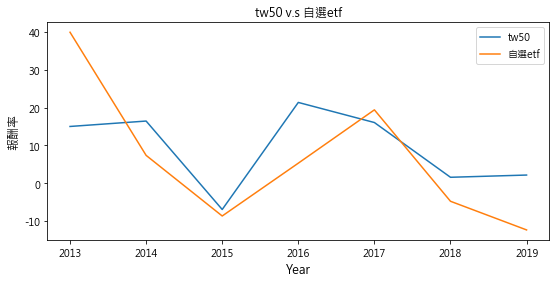

In [8]:
d_criteria, tw50_array, slct_array = drv.SearchBestCriteria\
(2012, 2018, criteria=example_function, verbose=False, graph=True)